<a href="https://colab.research.google.com/github/2003MADHAV/Deeplearning_project_beased_experiments-/blob/main/007_diabetic_retinopathy_detection_using_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
dataset lin "https://www.kaggle.com/code/mutlaqkhaledaljoudi/diabetic-retinopathy-detection-using-cnn/input"

import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/prepossessed-arrays-of-binary-data/Binary_images_data_128.npz
/kaggle/input/prepossessed-arrays-of-binary-data/Binary_images_data_90.npz
/kaggle/input/prepossessed-arrays-of-binary-data/1000_Binary_images_data_264.npz
/kaggle/input/prepossessed-arrays-of-binary-data/1000_Binary Dataframe
/kaggle/input/prepossessed-arrays-of-binary-data/Binary_images_data_264.npz
/kaggle/input/prepossessed-arrays-of-binary-data/1000_Binary_images_data_128.npz
/kaggle/input/prepossessed-arrays-of-binary-data/1000_Binary_images_data_90.npz
/kaggle/input/prepossessed-arrays-of-binary-data/Binary Dataframe
/kaggle/input/diabetic-retinopathy-detection/train.zip.003
/kaggle/input/diabetic-retinopathy-detection/test.zip.004
/kaggle/input/diabetic-retinopathy-detection/test.zip.005
/kaggle/input/diabetic-retinopathy-detection/train.zip.002
/kaggle/input/diabetic-retinopathy-detection/test.zip.006
/kaggle/input/diabetic-retinopathy-detection/test.zip.003
/kaggle/input/diabetic-retinopathy-detection

In [ ]:
import numpy as np
import pandas as pd
import cv2
from PIL import Image

import tensorflow as tf
from tensorflow.keras.optimizers import *
from tensorflow.keras.losses import *
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.callbacks import *
from tensorflow.keras.preprocessing.image import *
from tensorflow.keras.utils import *
from sklearn.metrics import *
from sklearn.model_selection import *
import tensorflow.keras.backend as K

from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from skimage.io import *
%config Completer.use_jedi = False
import time
from sklearn.metrics import confusion_matrix

print("All modules have been imported")


All modules have been imported


In [ ]:
info=pd.read_csv("../input/prepossessed-arrays-of-binary-data/1000_Binary Dataframe")
info=info.drop('Unnamed: 0',axis=1)
info.head()

,exists,eye_side,level,path,patient_id,level_cat
0,True,left,0,../input/diabetic-retinopathy-detection/10_lef...,10,[1. 0.]
1,True,right,0,../input/diabetic-retinopathy-detection/10_rig...,10,[1. 0.]
2,True,left,0,../input/diabetic-retinopathy-detection/13_lef...,13,[1. 0.]
3,True,right,0,../input/diabetic-retinopathy-detection/13_rig...,13,[1. 0.]
4,True,left,0,../input/diabetic-retinopathy-detection/17_lef...,17,[1. 0.]


In [ ]:
info.level.value_counts()

0    739
1    261
Name: level, dtype: int64

<AxesSubplot:ylabel='level'>

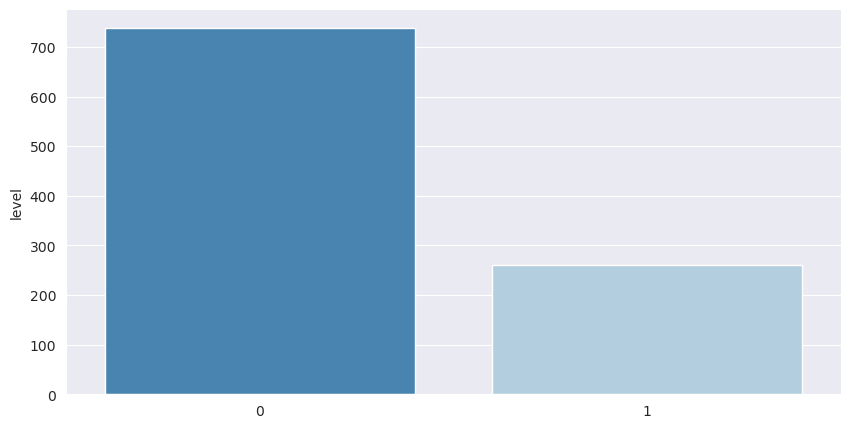

In [ ]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(x=info.level.unique(),y=info.level.value_counts(),palette='Blues_r',ax=ax)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


<AxesSubplot:>

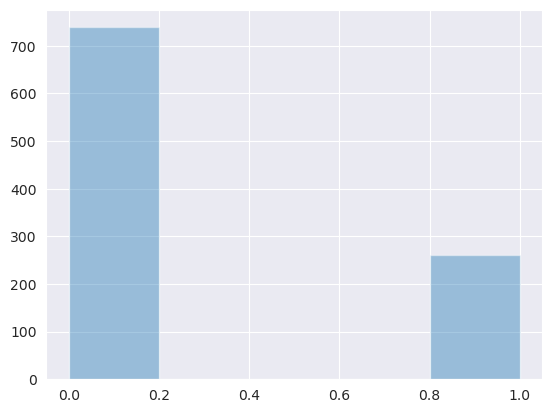

In [ ]:
sizes = info['level'].values
sns.distplot(sizes, kde=False)

In [ ]:
Binary_90 = np.load('../input/prepossessed-arrays-of-binary-data/1000_Binary_images_data_90.npz')
X_90=Binary_90['a']
Binary_128 = np.load('../input/prepossessed-arrays-of-binary-data/1000_Binary_images_data_128.npz')
X_128=Binary_128['a']
Binary_264 = np.load('../input/prepossessed-arrays-of-binary-data/1000_Binary_images_data_264.npz')
X_264=Binary_264['a']
y=info['level'].values


print(X_90.shape)
print(X_128.shape)
print(X_264.shape)
print(y.shape)

(1000, 24300)
(1000, 49152)
(1000, 209088)
(1000,)


In [ ]:
print("Shape before reshaping X_90" +str(X_90.shape))
X_90=X_90.reshape(1000,90,90,3)
print("Shape after reshaping X_90" +str(X_90.shape))
print("\n\n")

print("Shape before reshaping X_128" +str(X_128.shape))
X_128=X_128.reshape(1000,128,128,3)
print("Shape after reshaping X_128" +str(X_128.shape))
print("\n\n")

print("Shape before reshaping X_264" +str(X_264.shape))
X_264=X_264.reshape(1000,264,264,3)
print("Shape after reshaping X_264" +str(X_264.shape))

Shape before reshaping X_90(1000, 24300)
Shape after reshaping X_90(1000, 90, 90, 3)



Shape before reshaping X_128(1000, 49152)
Shape after reshaping X_128(1000, 128, 128, 3)



Shape before reshaping X_264(1000, 209088)
Shape after reshaping X_264(1000, 264, 264, 3)


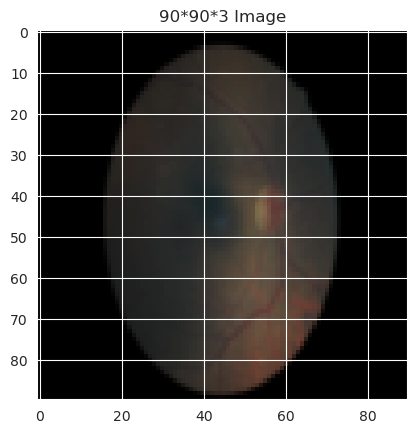

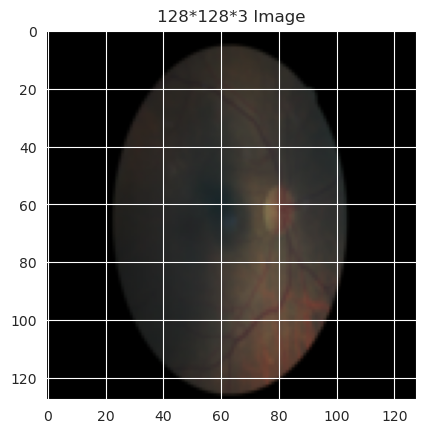

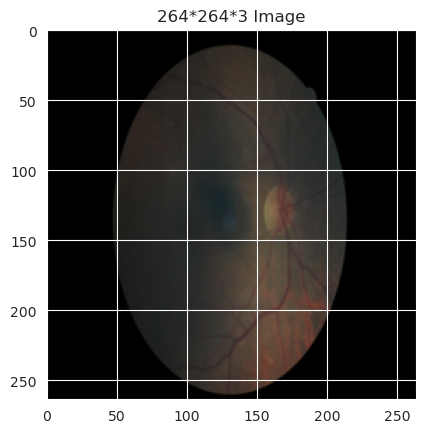

In [ ]:
plt.title("90*90*3 Image")
plt.imshow(X_90[1])
plt.show()

plt.title("128*128*3 Image")
plt.imshow(X_128[1])
plt.show()

plt.title("264*264*3 Image")
plt.imshow(X_264[1])
plt.show()

In [ ]:
X=np.array(X_264)
Y=np.array(y)
# Y=to_categorical(Y,5)
x_train, x_test1, y_train, y_test1 = train_test_split(X, Y, test_size=0.4, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_test1, y_test1, test_size=0.5, random_state=42)
print(len(x_train),len(x_val),len(x_test))

600 200 200


In [ ]:
Y1=pd.DataFrame(Y)
Y1.value_counts()

0    739
1    261
dtype: int64

In [ ]:
# Create the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(264, 264, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(5, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val))

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)


Epoch 1/10
19/19 [==============================] - 58s 3s/step - loss: 1.0444 - accuracy: 0.6533 - val_loss: 0.6183 - val_accuracy: 0.7300
Epoch 2/10
19/19 [==============================] - 56s 3s/step - loss: 0.5978 - accuracy: 0.7250 - val_loss: 0.6347 - val_accuracy: 0.7300
Epoch 3/10
19/19 [==============================] - 56s 3s/step - loss: 0.5854 - accuracy: 0.7267 - val_loss: 0.5938 - val_accuracy: 0.7300
Epoch 4/10
19/19 [==============================] - 56s 3s/step - loss: 0.5885 - accuracy: 0.7267 - val_loss: 0.5932 - val_accuracy: 0.7300
Epoch 5/10
19/19 [==============================] - 56s 3s/step - loss: 0.5727 - accuracy: 0.7267 - val_loss: 0.5922 - val_accuracy: 0.7300
Epoch 6/10
19/19 [==============================] - 56s 3s/step - loss: 0.5656 - accuracy: 0.7267 - val_loss: 0.5843 - val_accuracy: 0.7300
Epoch 7/10
19/19 [==============================] - 56s 3s/step - loss: 0.5563 - accuracy: 0.7267 - val_loss: 0.5802 - val_accuracy: 0.7300
Epoch 8/10
19/19 [==

In [ ]:
from sklearn.metrics import confusion_matrix

# Get the predicted class labels for the test set
y_pred = np.argmax(model.predict(x_test), axis=-1)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)


7/7 [==============================] - 5s 626ms/step
Confusion Matrix:
[[143  14]
 [ 37   6]]


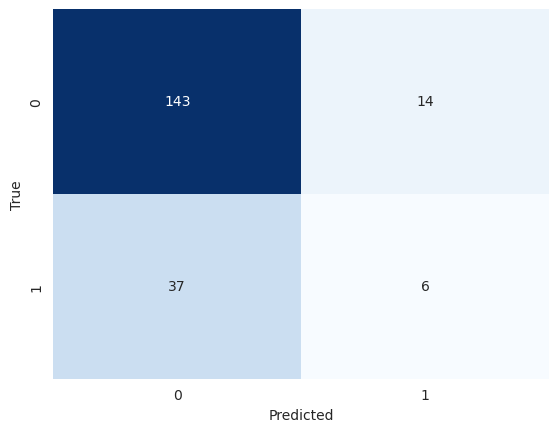

In [ ]:
import seaborn as sns

# Visualize the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()
